In [13]:
import pandas as pd
from plotnine import *
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv("nyc_squirrels.csv")
df.date = pd.to_datetime(df.date,format="%m%d%Y")
df["day"] = df.date.dt.day

df.head()

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts,day
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,2018-10-14,3,NaN,NaN,NaN,...,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13,14
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,2018-10-06,3,Adult,Gray,Cinnamon,...,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13,6
2,-73.976831,40.766718,2E-AM-1010-03,02E,AM,2018-10-10,3,Adult,Cinnamon,NaN,...,True,False,NaN,POINT (-73.9768311751004 40.76671780725581),NaN,19,4,19,13,10
3,-73.975725,40.769703,5D-PM-1018-05,05D,PM,2018-10-18,5,Juvenile,Gray,NaN,...,False,True,NaN,POINT (-73.9757249834141 40.7697032606755),NaN,19,4,19,13,18
4,-73.959313,40.797533,39B-AM-1018-01,39B,AM,2018-10-18,1,NaN,NaN,NaN,...,False,False,NaN,POINT (-73.9593126695714 40.797533370163),NaN,19,4,19,13,18


In [11]:
pltDat = df[["day", "long"]].groupby("day", as_index=False).count()
pltDat.head()

,day,long
0,6,337
1,7,405
2,8,285
3,10,335
4,12,218


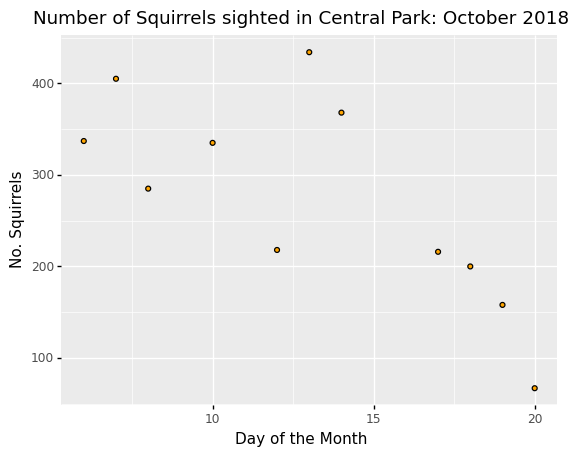

<ggplot: (185003322597)>

In [8]:
ggplot(pltDat, aes(x="day", y="long")) +\
    geom_point(fill="orange") +\
    labs(x="Day of the Month", y="No. Squirrels", title="Number of Squirrels sighted in Central Park: October 2018")

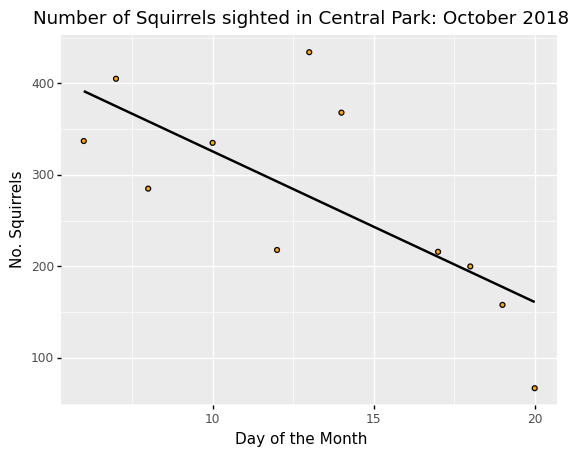

<ggplot: (185004096702)>

In [9]:
ggplot(pltDat, aes(x="day", y="long")) +\
    geom_point(fill="orange") +\
    geom_smooth(method="lm", formula="y~x", se=False) +\
    labs(x="Day of the Month", y="No. Squirrels", title="Number of Squirrels sighted in Central Park: October 2018")

In [17]:
mod = LinearRegression()
mod.fit(pltDat.day.to_numpy().reshape(-1,1), pltDat.long)
print(mod.intercept_, mod.coef_)

490.22533136966126 [-16.45471281]
